<a href="https://colab.research.google.com/github/sherryyuon/Hello_World/blob/master/COP_side_events_analysis_YY20240301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 13.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039297 sha256=e2801d218718bea7b0c25a6b832d5564ef95572de63b173c998391288b3c1bc6
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [3]:
pip install -U "tensorflow-text==2.15.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.2 MB/s eta 0:00:00


In [4]:
pip install "tf-models-official==2.15.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 10.0 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=93d244a157c89b3141a52e5bfe6cac2903dcaed1588e42af0fd25f2e8af361f9
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
# pip install --upgrade tensorflow tensorflow_probability

In [5]:
import tensorflow as tf
import tensorflow_probability as tfp

print("TensorFlow Version:", tf.__version__)
print("TensorFlow Probability Version:", tfp.__version__)

TensorFlow Version: 2.15.0
TensorFlow Probability Version: 0.23.0


In [6]:
import os
import shutil

import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [41]:
!pip install umap-learn hdbscan

In [53]:
import pandas as pd

# Load the dataset
df = pd.read_csv("all_side_events.csv", encoding='utf-8')

# Preview the data
print(df.head())

   COP_Year SE_COP_Number                                  Title/Description
0      2023         COP28  Accelerating innovation in the Early Warnings ...
1      2023         COP28  Operationalizing the Loss and Damage Fund with...
2      2023         COP28  Loss and Damage in Focus: 10 Years of the Wars...
3      2023         COP28  The Global Stocktake: How to strengthen climat...
4      2023         COP28  Crowdsourcing AI Solutions for Climate Change ...


In [54]:
from bertopic import BERTopic

# Create a BERTopic instance
topic_model = BERTopic(verbose=True)

# Fit the model on your dataset
docs = df['Title/Description'].tolist()
topics, probs = topic_model.fit_transform(docs)

2024-03-01 14:20:31,500 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2024-03-01 14:23:48,945 - BERTopic - Embedding - Completed ✓
2024-03-01 14:23:48,948 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-01 14:24:01,173 - BERTopic - Dimensionality - Completed ✓
2024-03-01 14:24:01,178 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-01 14:24:01,392 - BERTopic - Cluster - Completed ✓
2024-03-01 14:24:01,401 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-01 14:24:01,957 - BERTopic - Representation - Completed ✓


In [43]:
from umap import UMAP
from hdbscan import HDBSCAN

# Create UMAP and HDBSCAN instances with custom parameters
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom')

# Initialize BERTopic with the custom UMAP and HDBSCAN instances
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)

topics, _ = topic_model.fit_transform(docs)
topic_model.save("cop_analysis_bertopic_model_20240301")

2024-03-01 14:10:32,547 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [55]:
# Get and print the top topics
top_topics = topic_model.get_topic_info()
print(top_topics.head())

   Topic  Count                                      Name  \
0     -1   1479                          -1_and_to_the_of   
1      0    183       0_food_agriculture_systems_security   
2      1    152  1_finance_financial_investment_financing   
3      2    115                2_rights_justice_human_law   
4      3    113    3_transport_shipping_aviation_maritime   

                                      Representation  \
0  [and, to, the, of, in, climate, for, will, ada...   
1  [food, agriculture, systems, security, farmers...   
2  [finance, financial, investment, financing, pr...   
3  [rights, justice, human, law, legal, climate, ...   
4  [transport, shipping, aviation, maritime, emis...   

                                 Representative_Docs  
0  [Food security at 1.5° or beyond: Paris action...  
1  [Climate Resilience in Food Systems: Why act n...  
2  [The GCF and other tools for unlocking private...  
3  [Human Rights in National Climate Policies: Ov...  
4  [MP Transport- Tra

In [56]:
topic_model.visualize_barchart(top_n_topics=12)

In [57]:
topic_model

In [60]:
topic_model.visualize_topics()

In [59]:
# Save the intertopic distance map to an HTML file
topic_visualization = topic_model.visualize_topics()
topic_visualization.write_html('intertopic_distance_map.html')

In [61]:
topic_model.visualize_hierarchy(top_n_topics=25)

In [63]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [64]:
topic_model.visualize_hierarchy(top_n_topics=100)

In [65]:
topic_model.visualize_heatmap(top_n_topics=25)

In [66]:
topic_model.visualize_heatmap(top_n_topics=50)

In [67]:
topic_model.visualize_heatmap()

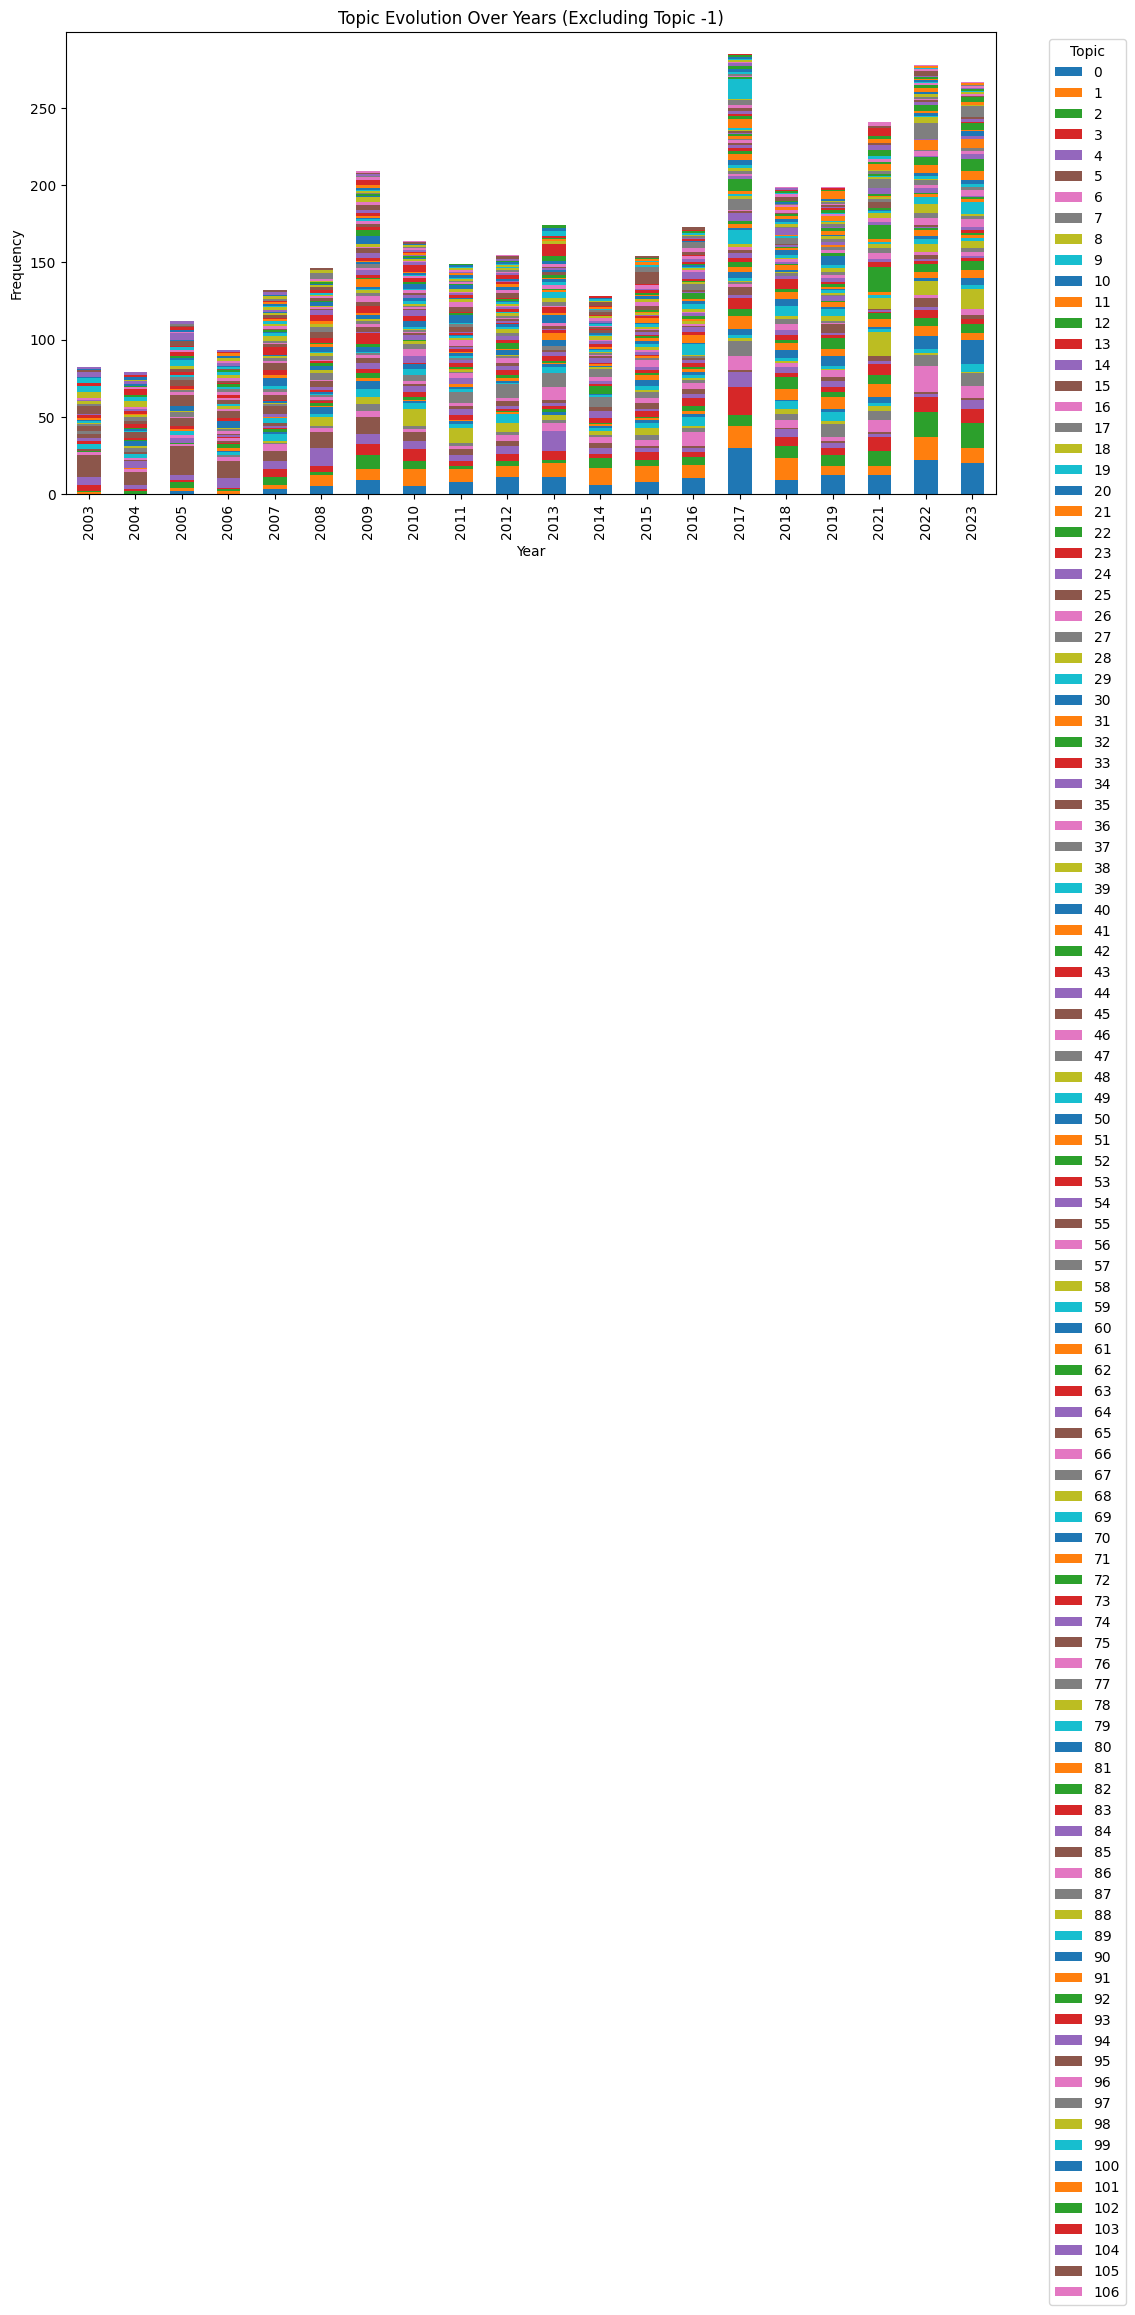

In [68]:
import matplotlib.pyplot as plt

# Assuming 'topics' is a list of topic assignments for each document
# and 'timestamps' is a list of corresponding years (as strings)
df['Topic'] = topics

# Filter out documents associated with topic -1
filtered_df = df[df['Topic'] != -1]

# Aggregate data, excluding topic -1
topic_counts_per_year = filtered_df.groupby(['COP_Year', 'Topic']).size().unstack(fill_value=0)

# Plot the aggregated data without topic -1
topic_counts_per_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Topic Evolution Over Years (Excluding Topic -1)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [69]:
# Save the aggregated topic counts per year to a CSV file
topic_counts_per_year.to_csv('topic_counts_per_year.csv')

In [70]:
# Initialize a list to store topic number and labels
topics_labels = []

# Loop through each topic number and generate labels
for topic_num in range(95):  # Assuming topics 0 to 94
    topic = topic_model.get_topic(topic_num)

    # Generate a label for the topic based on its top words
    if topic:  # Check if the topic exists
        topic_label = ", ".join([word for word, _ in topic[:5]])  # Use the top 5 words for the label
        topics_labels.append((topic_num, topic_label))
    else:
        topics_labels.append((topic_num, "Topic not found"))

# Convert the list to a DataFrame
topics_df = pd.DataFrame(topics_labels, columns=['Topic Number', 'Label'])

# Save the DataFrame to a CSV file
topics_df.to_csv('topics_labels.csv', index=False)

In [71]:
topic_model.save("bertopic_topic evolution by cop year_20240301")

2024-03-01 14:32:42,480 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
# Ignore everything after this part

In [ ]:
!pip install transformers datasets
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install --upgrade accelerate transformers torch

In [ ]:
!pip list

In [ ]:
# 数据已经格式化为：label\ttext
dataset = load_dataset('text', data_files='all_side_events_description.txt', split='train')

In [ ]:
from sklearn.cluster import KMeans
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
import os

In [ ]:
import torch

# Load ClimateBERT model and tokenizer
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("climatebert/distilroberta-base-climate-f")
model = AutoModelForMaskedLM.from_pretrained("climatebert/distilroberta-base-climate-f")

# Load text data from file
with open("all_side_events_description.txt", "r", encoding="utf-8") as file:
    text_data = file.readlines()

# Tokenize the text data
encoded_input = tokenizer(text_data, padding=True, truncation=True, return_tensors="pt")

# Generate embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract embeddings
embeddings = model_output.last_hidden_state[:, 0, :].numpy()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Cluster embeddings to identify topics
num_clusters = 5  # You can adjust this number based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Add cluster labels to the text data
df = pd.DataFrame(list(zip(text_data, cluster_labels)), columns=["Text", "Cluster"])

# Get the top topics
top_topics = df["Cluster"].value_counts().index[:5]  # Get the top 5 clusters

# Visualize the top topics
plt.figure(figsize=(10, 6))
df["Cluster"].value_counts().plot(kind="bar")
plt.title("Top Topics")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Load the data
df = pd.read_csv("all_side_events.csv")

# Preprocess the text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

df['Processed_Text'] = df['Title/Description'].apply(preprocess_text)

In [ ]:
# Calculate N-gram frequencies over time
n = 2  # Change this value for different n-grams
ngram_freq_over_time = {}

for year, group in df.groupby('COP_Year'):
    ngram_freq_over_time[year] = Counter()
    for tokens in group['Processed_Text']:
        ngrams = nltk.ngrams(tokens, n)
        ngram_freq_over_time[year] += Counter(ngrams)

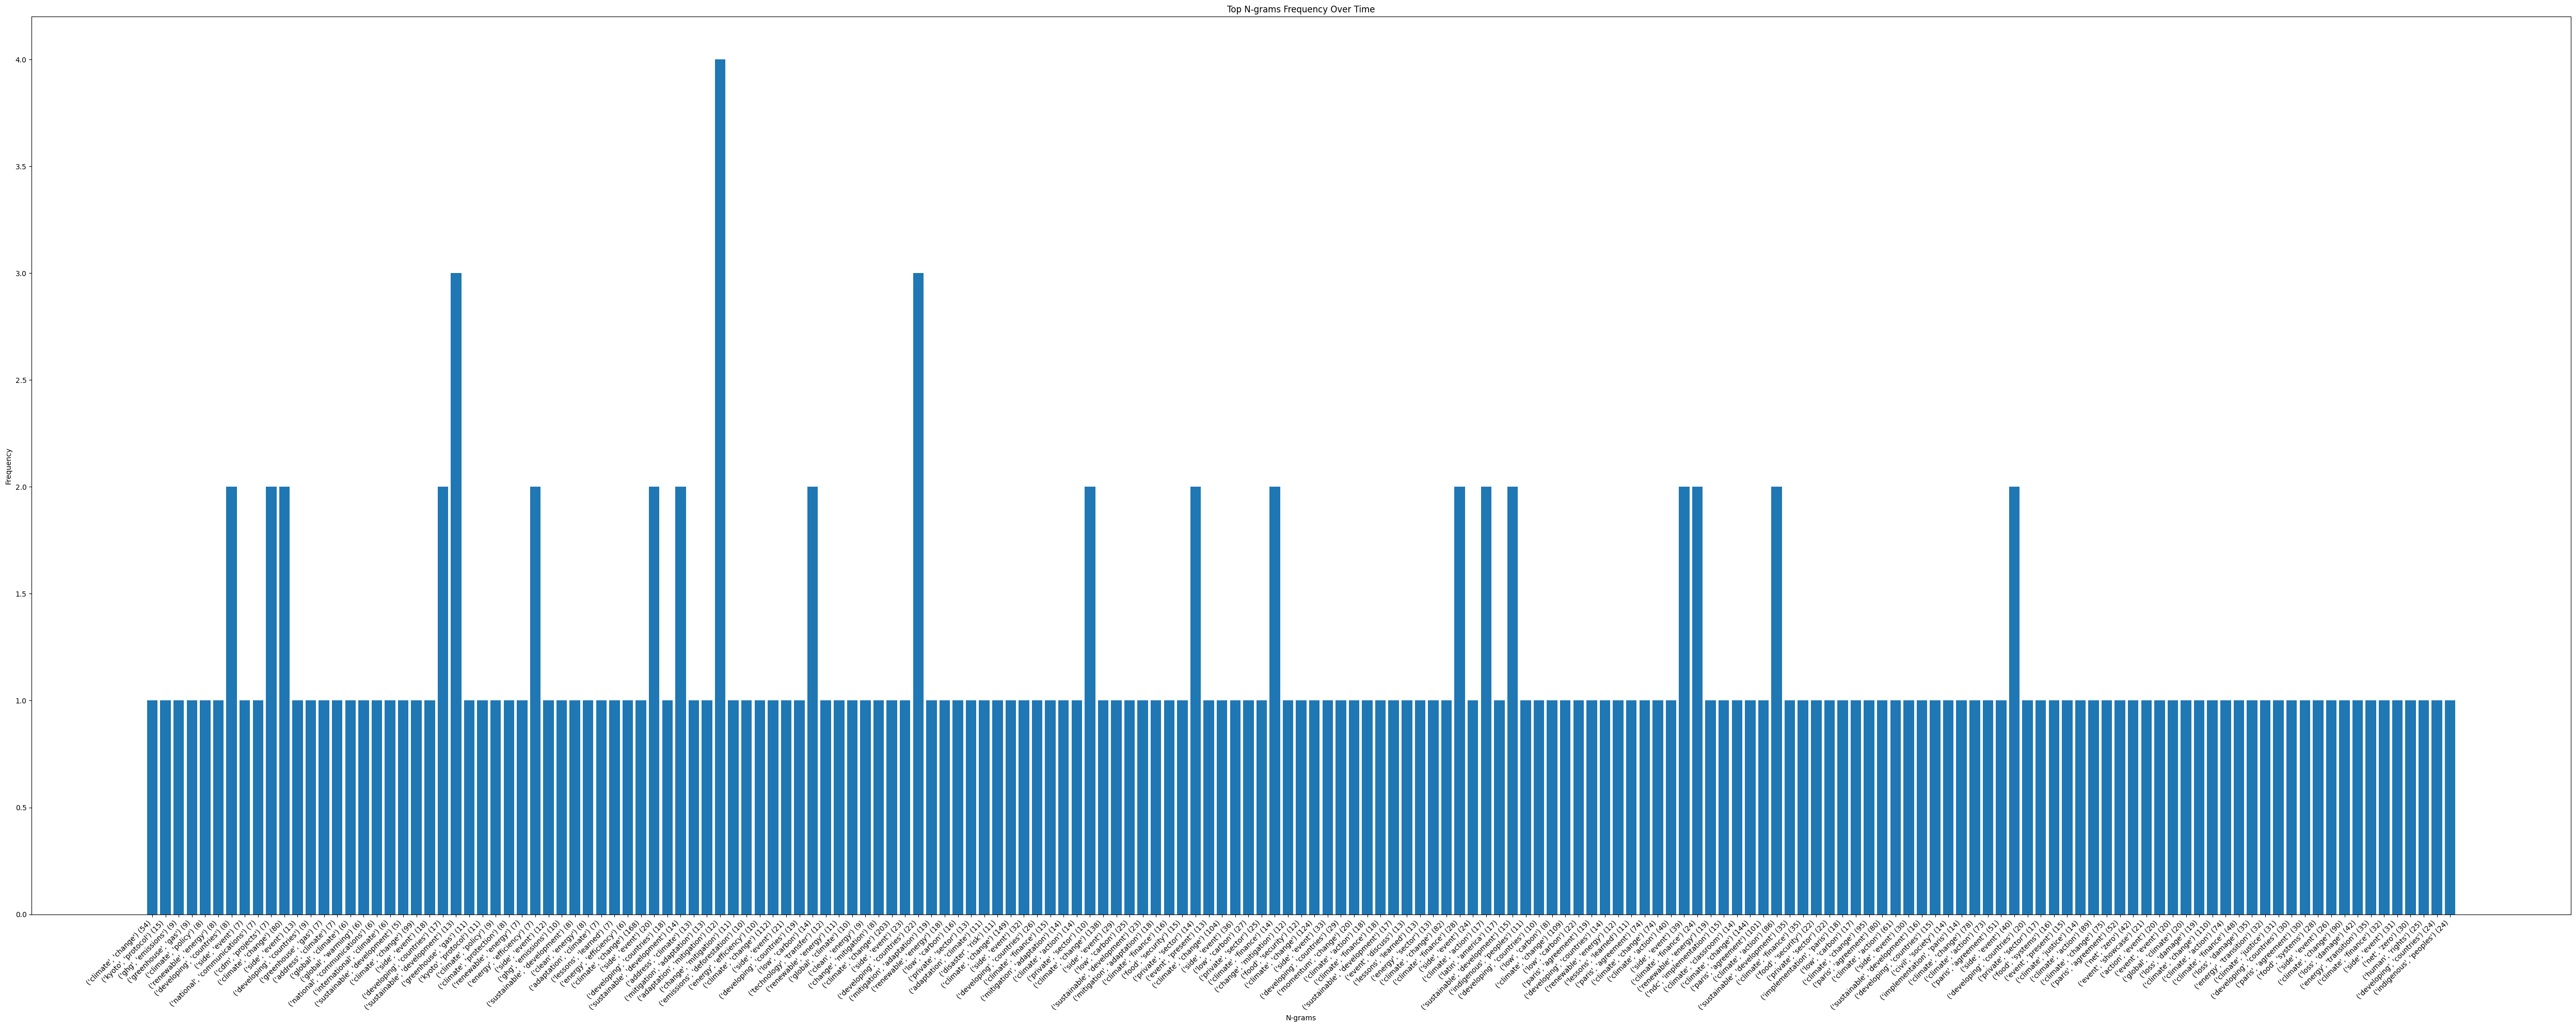

In [ ]:
# Visualize the results
top_ngrams = Counter()

for year, freq_counter in ngram_freq_over_time.items():
    top_ngrams.update(freq_counter.most_common(10))  # Adjust the number of top n-grams to visualize

# Plotting
plt.figure(figsize=(50, 20))
x_labels = [f"{ngram[0]} ({ngram[1]})" for ngram in top_ngrams.keys()]
plt.bar(x_labels, top_ngrams.values())
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.title('Top N-grams Frequency Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# 合并所有文本，以便找出最常见的bigrams
text = " ".join(df['Title/Description'].tolist()).lower()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# 应用预处理并合并所有tokens
all_tokens = sum(df['Title/Description'].apply(preprocess_text), [])

# 生成bigrams
bigram_list = list(bigrams(all_tokens))

# 计算频率
bigram_counts = Counter(bigram_list)
most_common_bigrams = bigram_counts.most_common(20)

# 显示最常见的20个bigrams
print("Most common 20 bigrams:", most_common_bigrams)

Most common 20 bigrams: [(('climate', 'change'), 2168), (('climate', 'action'), 612), (('side', 'event'), 533), (('paris', 'agreement'), 437), (('developing', 'countries'), 358), (('climate', 'finance'), 314), (('sustainable', 'development'), 254), (('low', 'carbon'), 218), (('private', 'sector'), 195), (('renewable', 'energy'), 191), (('mitigation', 'adaptation'), 180), (('adaptation', 'mitigation'), 148), (('loss', 'damage'), 147), (('indigenous', 'peoples'), 145), (('climate', 'justice'), 139), (('civil', 'society'), 136), (('lessons', 'learned'), 131), (('global', 'climate'), 131), (('food', 'security'), 127), (('human', 'rights'), 119)]


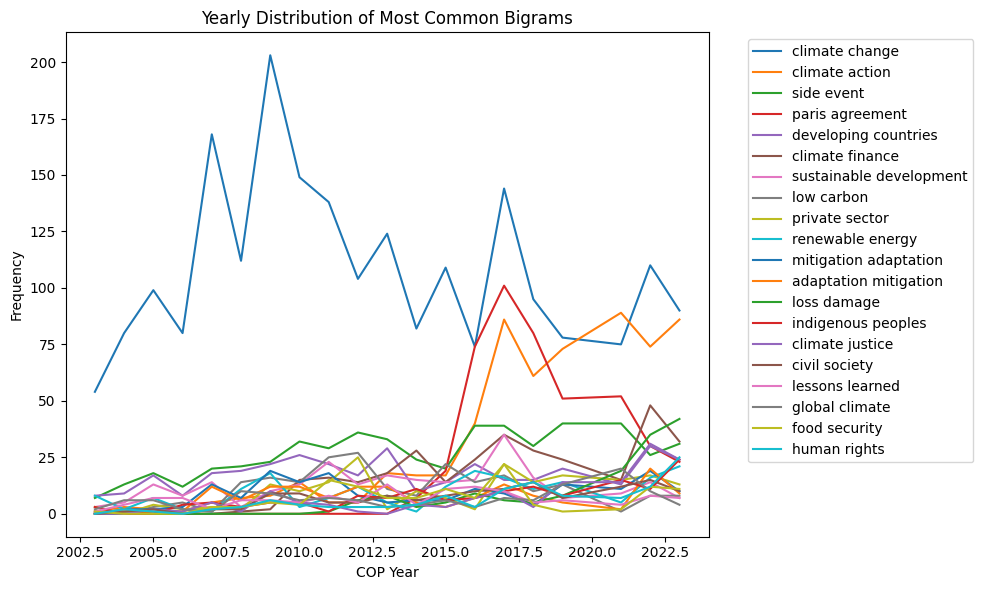

In [ ]:
# 初始化一个字典来存储每个bigram的年份分布
bigram_yearly_distribution = {bg: {year: 0 for year in df['COP_Year'].unique()} for bg, _ in most_common_bigrams}

# 对于每个年份，计算最常见bigrams的出现次数
for year in df['COP_Year'].unique():
    yearly_texts = df[df['COP_Year'] == year]['Title/Description'].apply(lambda x: ' '.join(preprocess_text(x)))
    yearly_tokens = sum(yearly_texts.apply(word_tokenize), [])
    yearly_bigrams = list(bigrams(yearly_tokens))
    yearly_bigram_counts = Counter(yearly_bigrams)

    for bg in bigram_yearly_distribution:
        if bg in yearly_bigram_counts:
            bigram_yearly_distribution[bg][year] = yearly_bigram_counts[bg]

# 可视化
plt.figure(figsize=(10, 6)) # 调整图形大小
for bg, years in bigram_yearly_distribution.items():
    years_sorted = sorted(years.items())  # 确保年份是有序的
    plt.plot([year for year, _ in years_sorted], [count for _, count in years_sorted], label=' '.join(bg))

plt.xlabel('COP Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of Most Common Bigrams')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Most common 100 bigrams: [(('climate', 'change'), 2168), (('climate', 'action'), 612), (('side', 'event'), 533), (('paris', 'agreement'), 437), (('developing', 'countries'), 358), (('climate', 'finance'), 314), (('sustainable', 'development'), 254), (('low', 'carbon'), 218), (('private', 'sector'), 195), (('renewable', 'energy'), 191), (('mitigation', 'adaptation'), 180), (('adaptation', 'mitigation'), 148), (('loss', 'damage'), 147), (('indigenous', 'peoples'), 145), (('climate', 'justice'), 139), (('civil', 'society'), 136), (('lessons', 'learned'), 131), (('global', 'climate'), 131), (('food', 'security'), 127), (('human', 'rights'), 119), (('energy', 'transition'), 116), (('ghg', 'emissions'), 115), (('event', 'discuss'), 111), (('event', 'present'), 111), (('capacity', 'building'), 107), (('climate', 'policy'), 106), (('clean', 'energy'), 105), (('energy', 'efficiency'), 105), (('address', 'climate'), 104), (('net', 'zero'), 103), (('event', 'explore'), 102), (('climate', 'resilie

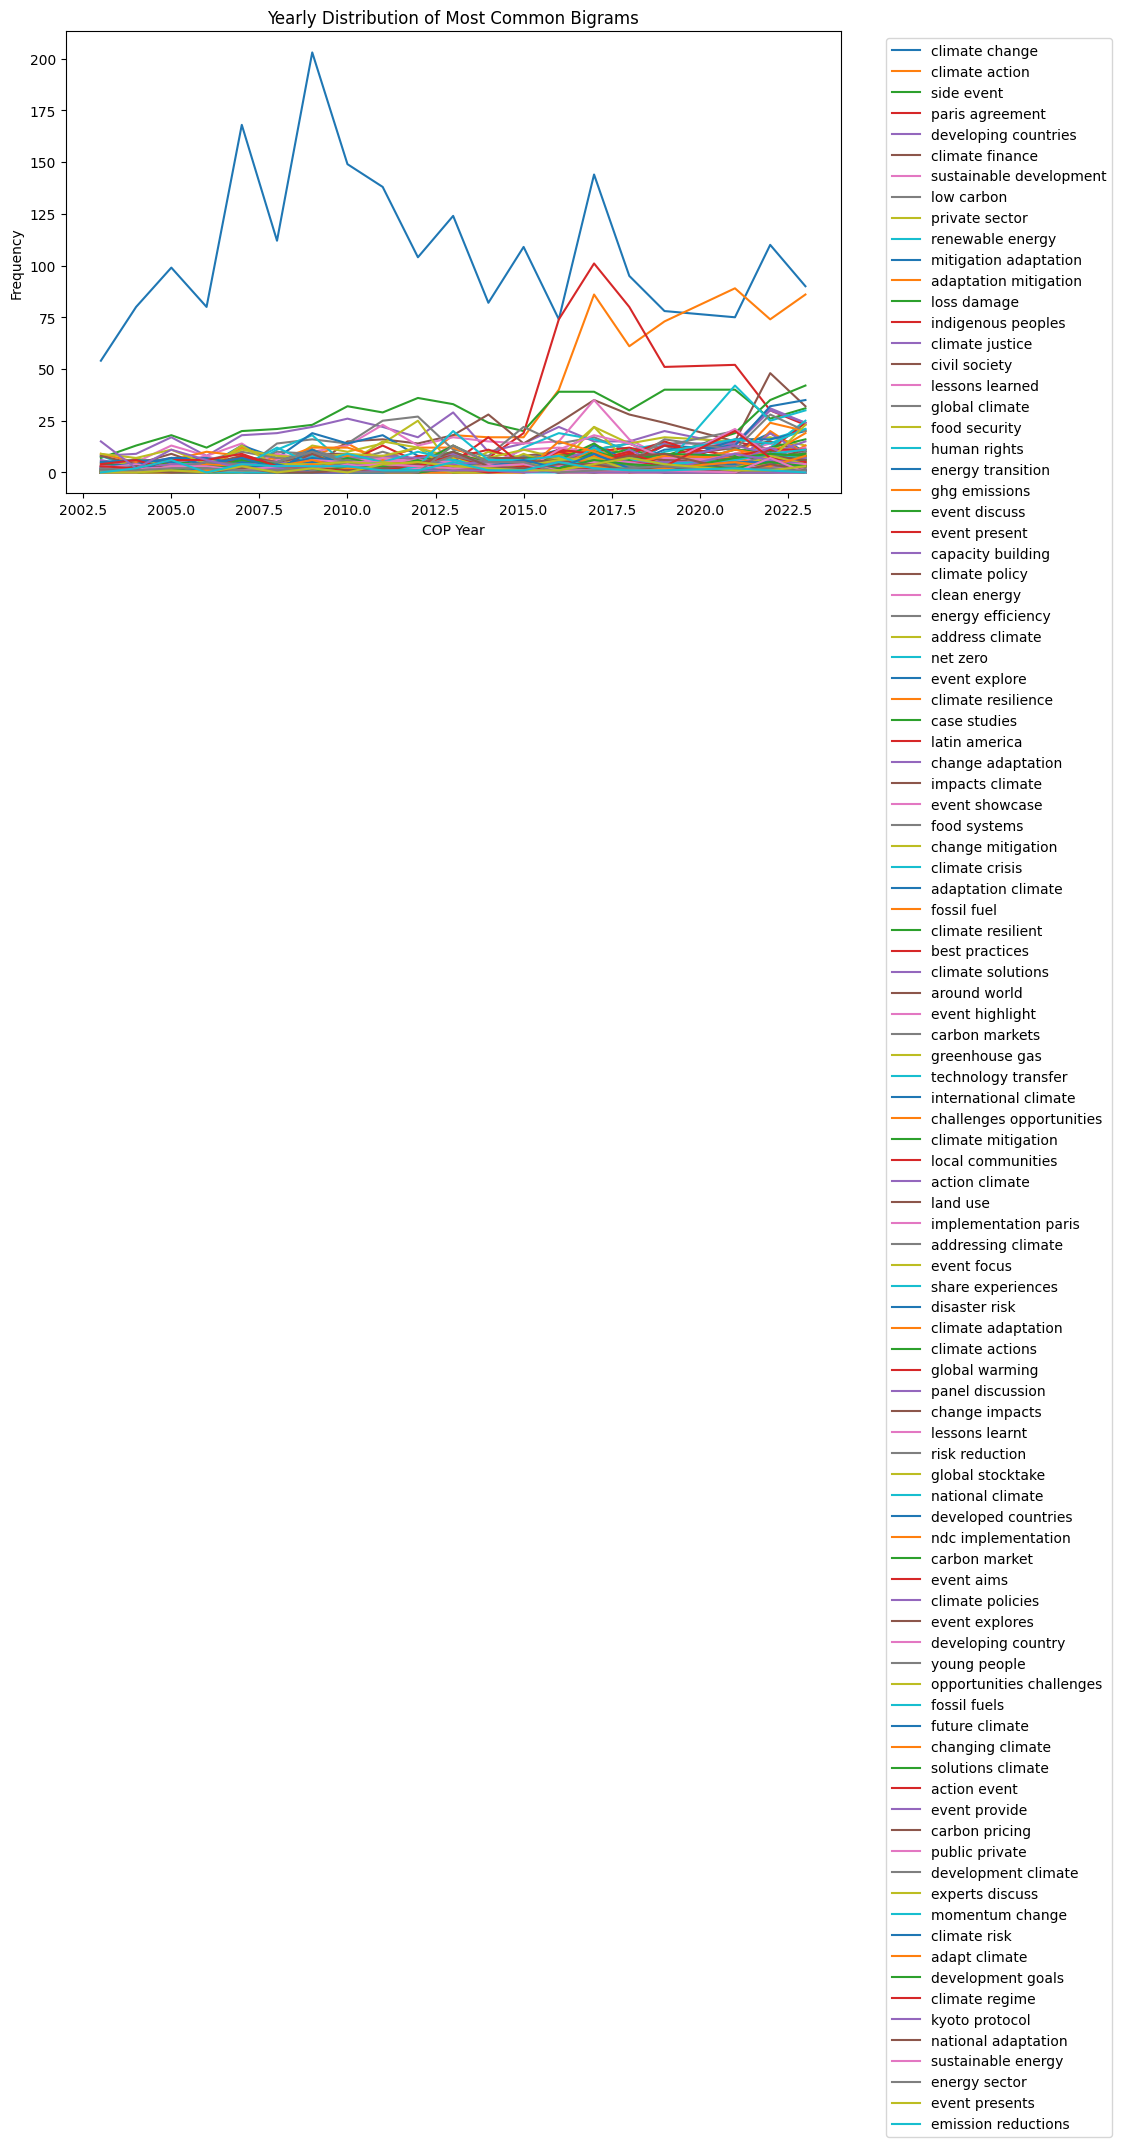

In [ ]:
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# 合并所有文本，以便找出最常见的bigrams
text = " ".join(df['Title/Description'].tolist()).lower()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# 应用预处理并合并所有tokens
all_tokens = sum(df['Title/Description'].apply(preprocess_text), [])

# 生成bigrams
bigram_list = list(bigrams(all_tokens))

# 计算频率
bigram_counts = Counter(bigram_list)
most_common_bigrams = bigram_counts.most_common(100)

# 显示最常见的100个bigrams
print("Most common 100 bigrams:", most_common_bigrams)

# 初始化一个字典来存储每个bigram的年份分布
bigram_yearly_distribution = {bg: {year: 0 for year in df['COP_Year'].unique()} for bg, _ in most_common_bigrams}

# 对于每个年份，计算最常见bigrams的出现次数
for year in df['COP_Year'].unique():
    yearly_texts = df[df['COP_Year'] == year]['Title/Description'].apply(lambda x: ' '.join(preprocess_text(x)))
    yearly_tokens = sum(yearly_texts.apply(word_tokenize), [])
    yearly_bigrams = list(bigrams(yearly_tokens))
    yearly_bigram_counts = Counter(yearly_bigrams)

    for bg in bigram_yearly_distribution:
        if bg in yearly_bigram_counts:
            bigram_yearly_distribution[bg][year] = yearly_bigram_counts[bg]

# 可视化
plt.figure(figsize=(10, 6)) # 调整图形大小
for bg, years in bigram_yearly_distribution.items():
    years_sorted = sorted(years.items())  # 确保年份是有序的
    plt.plot([year for year, _ in years_sorted], [count for _, count in years_sorted], label=' '.join(bg))

plt.xlabel('COP Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of Most Common Bigrams')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from nltk import trigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# 合并所有文本，以便找出最常见的bigrams
text = " ".join(df['Title/Description'].tolist()).lower()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# 应用预处理并合并所有tokens
all_tokens = sum(df['Title/Description'].apply(preprocess_text), [])

# 生成bigrams
trigram_list = list(trigrams(all_tokens))

# 计算频率
trigram_counts = Counter(trigram_list)
most_common_trigrams = trigram_counts.most_common(20)

# 显示最常见的20个trigrams
print("Most common 20 trigrams:", most_common_trigrams)

Most common 20 trigrams: [(('climate', 'change', 'adaptation'), 98), (('climate', 'change', 'mitigation'), 90), (('impacts', 'climate', 'change'), 76), (('address', 'climate', 'change'), 73), (('adaptation', 'climate', 'change'), 68), (('implementation', 'paris', 'agreement'), 58), (('climate', 'change', 'impacts'), 56), (('addressing', 'climate', 'change'), 54), (('side', 'event', 'present'), 41), (('climate', 'change', 'event'), 39), (('adapt', 'climate', 'change'), 38), (('low', 'carbon', 'development'), 38), (('disaster', 'risk', 'reduction'), 35), (('action', 'climate', 'change'), 34), (('implementing', 'paris', 'agreement'), 34), (('change', 'mitigation', 'adaptation'), 33), (('side', 'event', 'discuss'), 32), (('global', 'climate', 'action'), 32), (('green', 'climate', 'fund'), 29), (('climate', 'change', 'policy'), 29)]


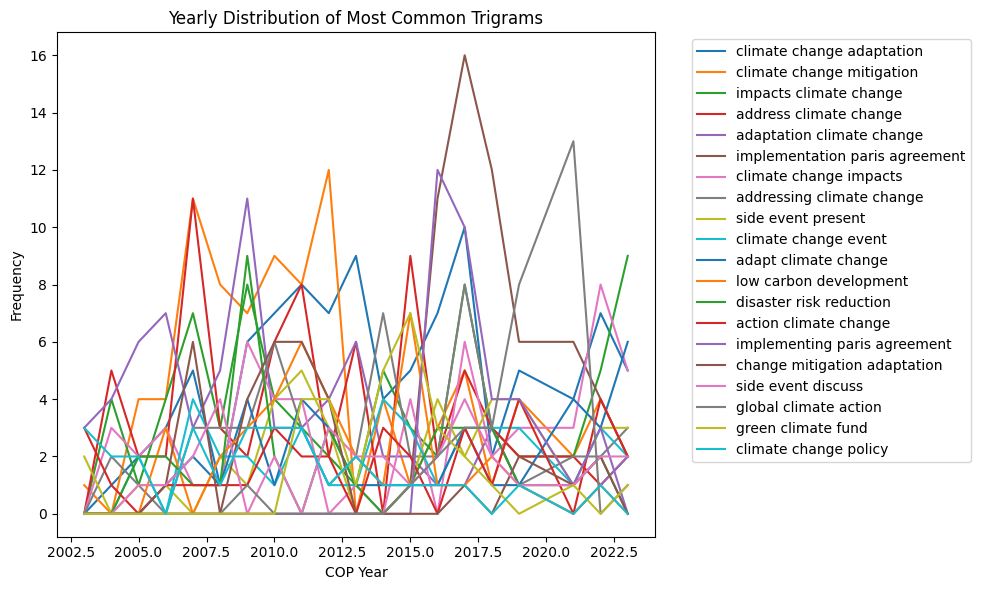

In [ ]:
# 初始化一个字典来存储每个trigram的年份分布
trigram_yearly_distribution = {bg: {year: 0 for year in df['COP_Year'].unique()} for bg, _ in most_common_trigrams}

# 对于每个年份，计算最常见bigrams的出现次数
for year in df['COP_Year'].unique():
    yearly_texts = df[df['COP_Year'] == year]['Title/Description'].apply(lambda x: ' '.join(preprocess_text(x)))
    yearly_tokens = sum(yearly_texts.apply(word_tokenize), [])
    yearly_trigrams = list(trigrams(yearly_tokens))
    yearly_trigram_counts = Counter(yearly_trigrams)

    for bg in trigram_yearly_distribution:
        if bg in yearly_trigram_counts:
            trigram_yearly_distribution[bg][year] = yearly_trigram_counts[bg]

# 可视化
plt.figure(figsize=(10, 6)) # 调整图形大小
for bg, years in trigram_yearly_distribution.items():
    years_sorted = sorted(years.items())  # 确保年份是有序的
    plt.plot([year for year, _ in years_sorted], [count for _, count in years_sorted], label=' '.join(bg))

plt.xlabel('COP Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of Most Common Trigrams')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# 假设df已经存在，并且包含'Title/Description'和'COP_Year'

# 准备文本数据
docs = df['Title/Description'].tolist()

# 训练BERTopic模型
topic_model = BERTopic(verbose=True)
topics, _ = topic_model.fit_transform(docs)

# 将主题分配添加到DataFrame
df['Topic'] = topics

# 遍历每个主题
for topic in sorted(df['Topic'].unique()):
    print(f"Analyzing Topic {topic}")
    topic_df = df[df['Topic'] == topic]

    # 初始化bigram年份分布字典
    bigram_yearly_distribution = {}

    # 对于每个年份，计算bigrams的出现次数
    for year in sorted(topic_df['COP_Year'].unique()):
        yearly_texts = topic_df[topic_df['COP_Year'] == year]['Title/Description'].apply(lambda x: ' '.join(preprocess_text(x)))
        yearly_tokens = sum(yearly_texts.apply(word_tokenize), [])
        yearly_bigrams = list(bigrams(yearly_tokens))
        yearly_bigram_counts = Counter(yearly_bigrams)

        for bg, count in yearly_bigram_counts.items():
            if bg not in bigram_yearly_distribution:
                bigram_yearly_distribution[bg] = {year: 0 for year in sorted(topic_df['COP_Year'].unique())}
            bigram_yearly_distribution[bg][year] = count

    # 可以在这里添加可视化代码，或者将bigram_yearly_distribution存储/输出以便之后分析


2024-02-26 12:43:15,501 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2024-02-26 12:46:31,466 - BERTopic - Embedding - Completed ✓
2024-02-26 12:46:31,469 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-26 12:46:44,250 - BERTopic - Dimensionality - Completed ✓
2024-02-26 12:46:44,253 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-26 12:46:44,493 - BERTopic - Cluster - Completed ✓
2024-02-26 12:46:44,502 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-26 12:46:45,080 - BERTopic - Representation - Completed ✓


Analyzing Topic -1
Analyzing Topic 0
Analyzing Topic 1
Analyzing Topic 2
Analyzing Topic 3
Analyzing Topic 4
Analyzing Topic 5
Analyzing Topic 6
Analyzing Topic 7
Analyzing Topic 8
Analyzing Topic 9
Analyzing Topic 10
Analyzing Topic 11
Analyzing Topic 12
Analyzing Topic 13
Analyzing Topic 14
Analyzing Topic 15
Analyzing Topic 16
Analyzing Topic 17
Analyzing Topic 18
Analyzing Topic 19
Analyzing Topic 20
Analyzing Topic 21
Analyzing Topic 22
Analyzing Topic 23
Analyzing Topic 24
Analyzing Topic 25
Analyzing Topic 26
Analyzing Topic 27
Analyzing Topic 28
Analyzing Topic 29
Analyzing Topic 30
Analyzing Topic 31
Analyzing Topic 32
Analyzing Topic 33
Analyzing Topic 34
Analyzing Topic 35
Analyzing Topic 36
Analyzing Topic 37
Analyzing Topic 38
Analyzing Topic 39
Analyzing Topic 40
Analyzing Topic 41
Analyzing Topic 42
Analyzing Topic 43
Analyzing Topic 44
Analyzing Topic 45
Analyzing Topic 46
Analyzing Topic 47
Analyzing Topic 48
Analyzing Topic 49
Analyzing Topic 50
Analyzing Topic 51
Ana

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv("all_side_events.csv")

# Preview the data
print(df.head())

   COP_Year SE_COP_Number                                  Title/Description
0      2023         COP28  Accelerating innovation in the Early Warnings ...
1      2023         COP28  Operationalizing the Loss and Damage Fund with...
2      2023         COP28  Loss and Damage in Focus: 10 Years of the Wars...
3      2023         COP28  The Global Stocktake: How to strengthen climat...
4      2023         COP28  Crowdsourcing AI Solutions for Climate Change ...


In [ ]:
from bertopic import BERTopic

# Create a BERTopic instance
topic_model = BERTopic(verbose=True)

# Fit the model on your dataset
docs = df['Title/Description'].tolist()
topics, probs = topic_model.fit_transform(docs)

2024-02-26 12:47:26,576 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2024-02-26 12:50:39,928 - BERTopic - Embedding - Completed ✓
2024-02-26 12:50:39,929 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-26 12:50:51,758 - BERTopic - Dimensionality - Completed ✓
2024-02-26 12:50:51,761 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-26 12:50:51,968 - BERTopic - Cluster - Completed ✓
2024-02-26 12:50:51,976 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-26 12:50:52,550 - BERTopic - Representation - Completed ✓


In [ ]:
timestamps = df['COP_Year'].astype(str).tolist()

In [ ]:
print(len(docs), len(topics), len(timestamps))

4898 4898 4898


In [ ]:
unique_topics = set(topics)
print("Unique topics identified:", unique_topics)

Unique topics identified: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, -1}


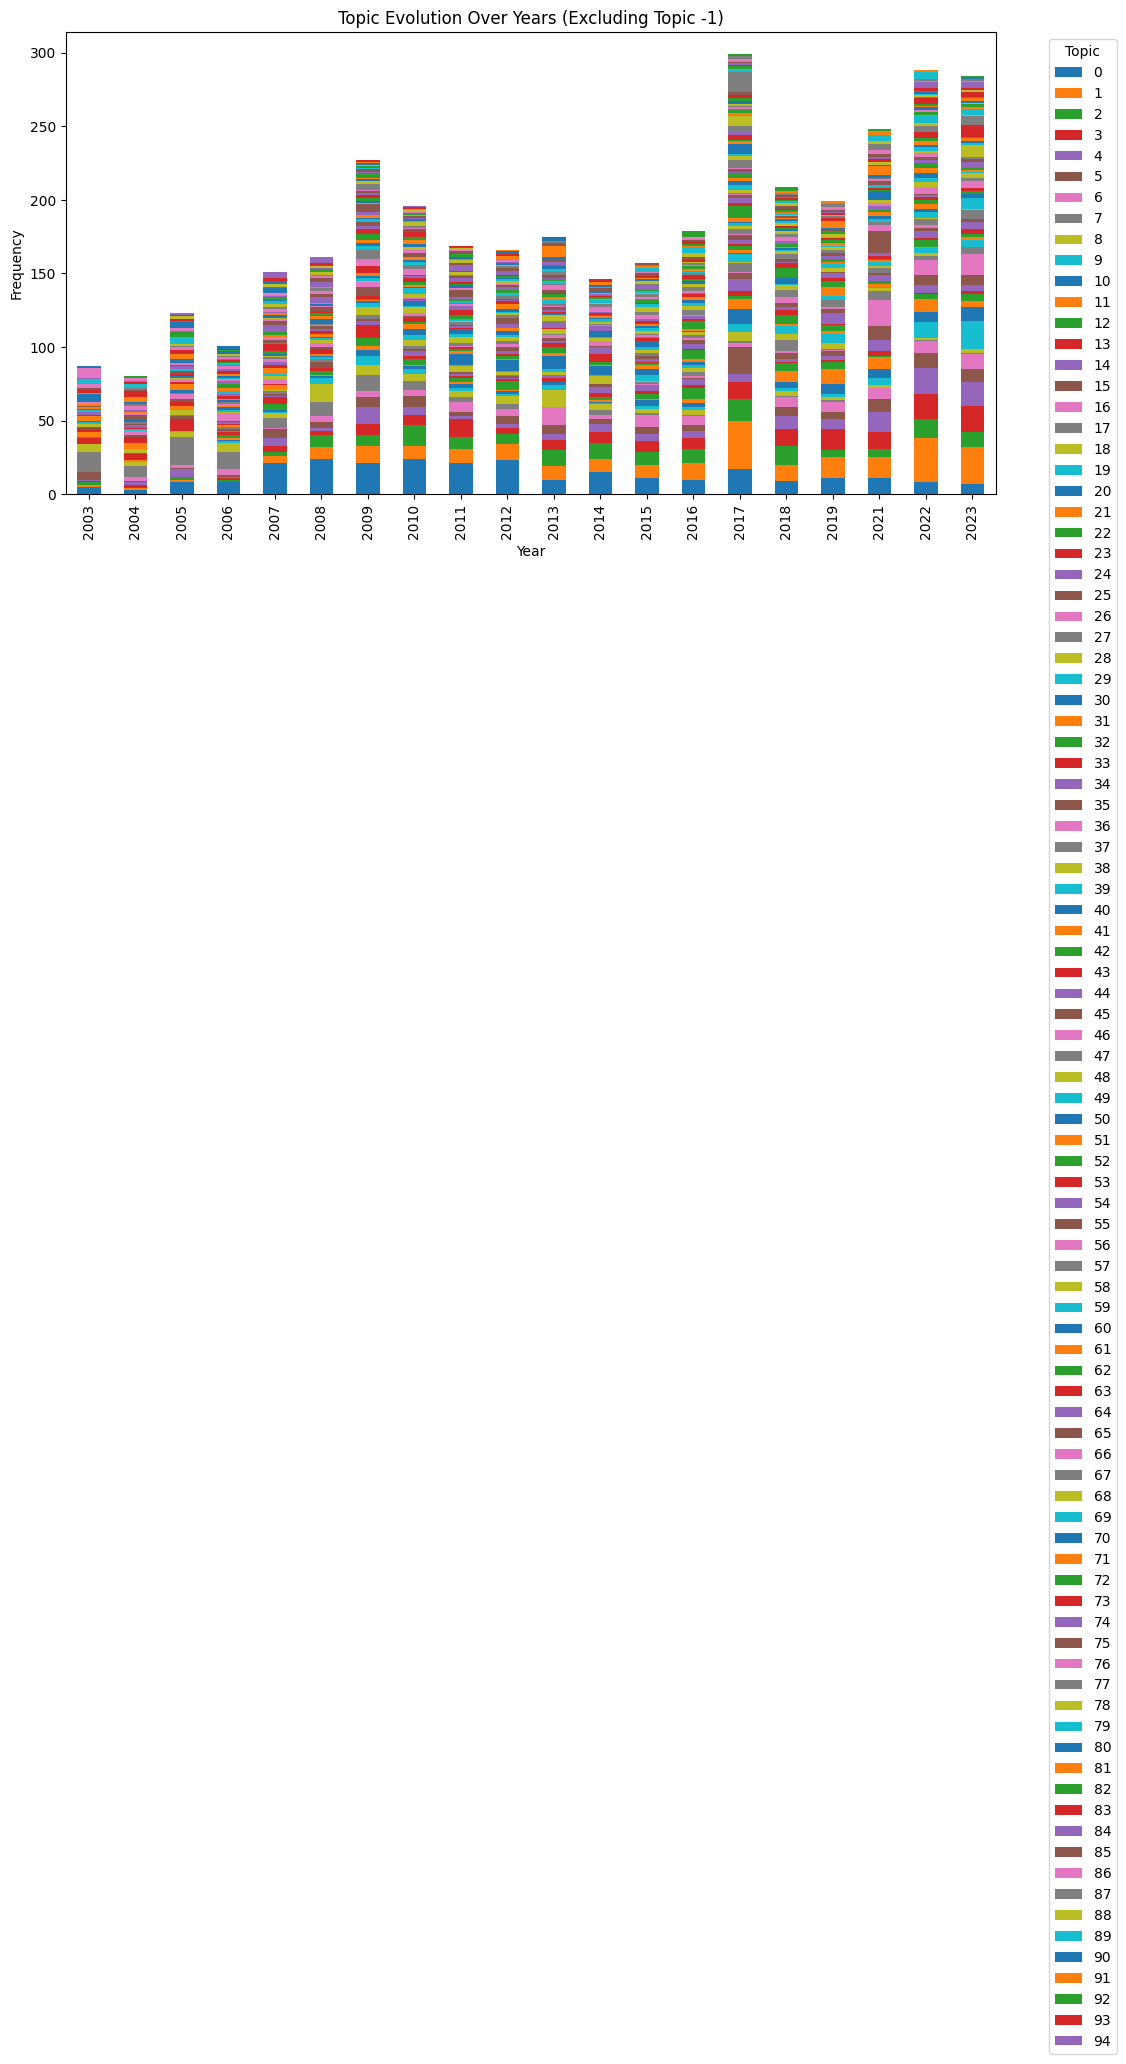

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'topics' is a list of topic assignments for each document
# and 'timestamps' is a list of corresponding years (as strings)
df['Topic'] = topics

# Filter out documents associated with topic -1
filtered_df = df[df['Topic'] != -1]

# Aggregate data, excluding topic -1
topic_counts_per_year = filtered_df.groupby(['COP_Year', 'Topic']).size().unstack(fill_value=0)

# Plot the aggregated data without topic -1
topic_counts_per_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Topic Evolution Over Years (Excluding Topic -1)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [ ]:
# print out the labels of the identified unique topics (0-100, -1 excluded as is outlier)
for topic_num in range(101):  # Loop from topic 0 to 100
    topic = topic_model.get_topic(topic_num)

    # Generate a label for the topic based on its top words
    if topic:  # Check if the topic exists
        topic_label = ", ".join([word for word, _ in topic[:5]])  # Use the top 5 words for the label
        print(f"Topic {topic_num}: {topic_label}")
    else:
        print(f"Topic {topic_num} not found")

Topic 0: food, agriculture, systems, security, farmers
Topic 1: finance, financial, private, financing, climate
Topic 2: transport, shipping, aviation, maritime, emissions
Topic 3: cdm, projects, project, methodologies, poas
Topic 4: technology, transfer, technologies, ict, tec
Topic 5: adaptation, change, mediterranean, impacts, africa
Topic 6: rights, human, justice, climate, litigation
Topic 7: energy, clean, efficiency, electricity, renewable
Topic 8: youth, young, education, youthled, action
Topic 9: cities, urban, city, un, mayors
Topic 10: ocean, oceans, coastal, marine, acidification
Topic 11: forest, forests, deforestation, restoration, cpf
Topic 12: us, states, california, leadership, subnational
Topic 13: carbon, markets, pricing, market, voluntary
Topic 14: water, management, healthcare, drought, adaptation
Topic 15: latin, america, mexico, in, caribbean
Topic 16: indigenous, peoples, knowledge, local, communities
Topic 17: gender, genderresponsive, equality, women, just
To

In [ ]:
# Explore: Get top 10 keywords for the first 5 topics
for topic_num in sorted(unique_topics)[:5]:
    if topic_num == -1:  # Skip the outlier topic
        continue
    print(f"Topic {topic_num}:")
    print(topic_model.get_topic(topic_num))

Topic 0:
[('food', 0.044666746779567994), ('agriculture', 0.035790970845589694), ('systems', 0.024648917594655064), ('security', 0.021117202067730118), ('farmers', 0.017021088741164418), ('agricultural', 0.015772975429711636), ('livestock', 0.01220183954578843), ('hunger', 0.01028856088494764), ('climate', 0.010257637414180207), ('and', 0.010122931242673024)]
Topic 1:
[('finance', 0.05186399690641561), ('financial', 0.020501814451524745), ('private', 0.017358824155711227), ('financing', 0.015581725068524113), ('climate', 0.014647535188566619), ('investment', 0.01270098754599222), ('institutions', 0.012409869093918502), ('public', 0.010991026936517342), ('flows', 0.010784465431708199), ('banks', 0.01072056128646899)]
Topic 2:
[('transport', 0.07304716128258994), ('shipping', 0.03009175002947667), ('aviation', 0.026227261586989833), ('maritime', 0.019339942702206764), ('emissions', 0.017384575194972378), ('international', 0.016479648524759777), ('mobility', 0.01616797487622024), ('imo', 

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go

# Example data - replace with your actual data
sources = []  # Indices of the source topics
targets = []  # Indices of the target topics
values = []   # Magnitude of relationship (e.g., shared documents, similarity)

# For illustration, let's assume a simple relationship
# This is where you'd calculate actual relationships based on your criteria
for i in range(25):
    for j in range(25):
        if i != j:  # Simple example to avoid self-links
            sources.append(i)
            targets.append(j)
            values.append(1)  # Placeholder value, replace with actual calculation

# Assuming you have labels for the top 25 topics
topic_labels = [f"Topic {i}" for i in range(25)]

In [ ]:
topic_model.save("bertopic_topic evolution by cop year")